In [55]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

data_set = pd.read_csv('./bollywood.csv')
print(data_set.head(5))
print(data_set.columns)
print(data_set.count())
print(data_set.describe())
print(data_set.info())

   SlNo Release Date           MovieName ReleaseTime      Genre  Budget  \
0     1    18-Apr-14            2 States          LW    Romance      36   
1     2     4-Jan-13        Table No. 21           N  Thriller       10   
2     3    18-Jul-14  Amit Sahni Ki List           N     Comedy      10   
3     4     4-Jan-13    Rajdhani Express           N     Drama        7   
4     5     4-Jul-14        Bobby Jasoos           N     Comedy      18   

   BoxOfficeCollection  YoutubeViews  YoutubeLikes  YoutubeDislikes  
0               104.00       8576361         26622             2527  
1                12.00       1087320          1129              137  
2                 4.00        572336           586               54  
3                 0.35         42626            86               19  
4                10.80       3113427          4512             1224  
Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'Yout

In [28]:
data_set.groupby('Genre')['SlNo'].count().sort_values(ascending=False)[[0]]

/var/folders/cb/4n_t8cdn3f585nqlh0rq122m0000gn/T/ipykernel_28319/3820838139.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_set.groupby('Genre')['SlNo'].count().sort_values(ascending=False)[[0]]


Genre
Comedy    36
Name: SlNo, dtype: int64

In [29]:
pd.crosstab(data_set['Genre'],data_set['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


In [67]:
data_set.columns

data_set["Release Date"] = pd.to_datetime(data_set["Release Date"])
data_set["Month"] = data_set["Release Date"].dt.month

data_set.groupby(['Month','Genre'])[['Month']].count()
# data_set.drop("Month",axis=1,inplace=True)

Month
Month Genre           
1      Drama         4
      Action         5
      Action         1
      Comedy         3
      Romance        3
      Thriller       2
      Thriller       2
2      Drama         5
      Action         3
      Comedy         2
      Romance        2
      Thriller       3
      Thriller       1
3      Drama         4
      Action         1
      Action         2
      Comedy         5
      Romance        1
      Thriller       6
4      Drama         2
      Action         1
      Comedy         3
      Romance        2
      Thriller       3
5      Drama         7
      Action         2
      Comedy         3
      Romance        4
      Thriller       2
6     Action         1
      Comedy         6
      Romance        2
      Thriller       1
7      Drama         2
      Action         3
      Comedy         3
      Romance        5
      Thriller       3
8      Drama         2
      Action         1
      Comedy         2
      Thriller       3
9      Drama         3
      Action         1
      Comedy         3
      Romance        2
      Thriller       1
10     Drama         4
      Action         1
      Comedy         4
11     Drama         1
      Action         1
      Comedy         2
      Romance        4
      Thriller       2
12     Drama         1
      Action         1

In [86]:
data_set.columns
data_set.dropna(subset='Budget')
data_set[data_set['Budget']>=25].groupby('Month')[['Month']].count()



,Month
Month,
1,8
2,9
3,7
4,4
5,3
6,5
7,6
8,7
9,5


In [95]:
data_set.columns
data_set['ROI']= (data_set['BoxOfficeCollection']-data_set['Budget'])/data_set['Budget']
data_set[['ROI','MovieName']].sort_values(ascending=False,by='ROI').head(5)

,ROI,MovieName
64,8.166667,Aashiqui 2
89,7.647059,PK
132,7.514286,Grand Masti
135,7.500000,The Lunchbox
87,6.240000,Fukrey


In [102]:
pd.crosstab(data_set['ReleaseTime'],data_set['ROI'])

data_set.groupby('ReleaseTime')[['ROI']].mean().sort_values(by="ROI")

,ROI
ReleaseTime,
N,0.657722
HS,0.850867
FS,0.973853
LW,1.127205


<Axes: xlabel='Budget', ylabel='Count'>

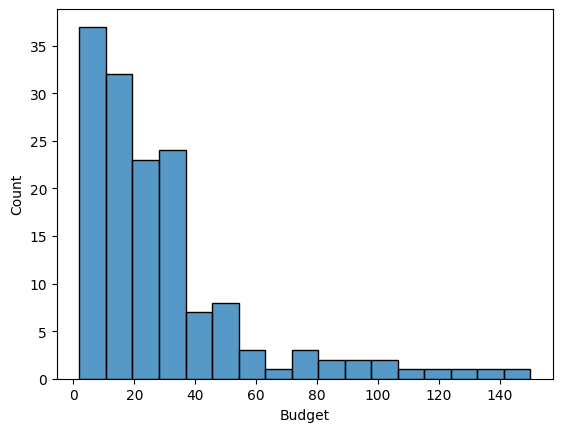

In [106]:
sb.histplot(data=data_set['Budget'])


/var/folders/cb/4n_t8cdn3f585nqlh0rq122m0000gn/T/ipykernel_28319/1315898064.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_set['Budget'])


<Axes: xlabel='Budget', ylabel='Density'>

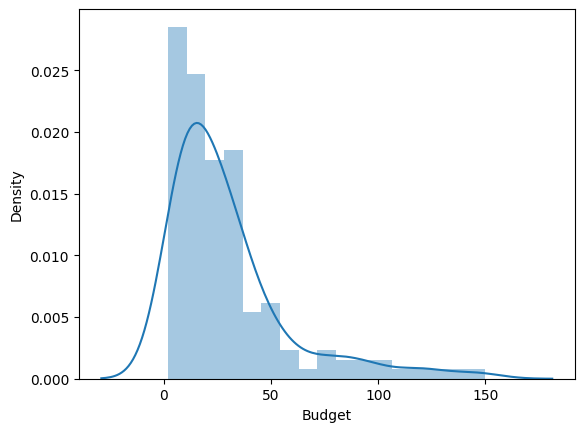

In [105]:
sb.distplot(data_set['Budget'])

           SlNo  Release Date  MovieName  ReleaseTime  Budget  \
Genre                                                           
 Drama       35            35         35           35      35   
Action       21            21         21           21      21   
Action        3             3          3            3       3   
Comedy       36            36         36           36      36   
Romance      25            25         25           25      25   
Thriller     26            26         26           26      26   
Thriller      3             3          3            3       3   

           BoxOfficeCollection  YoutubeViews  YoutubeLikes  YoutubeDislikes  \
Genre                                                                         
 Drama                      35            35            35               35   
Action                      21            21            21               21   
Action                       3             3             3                3   
Comedy             

/var/folders/cb/4n_t8cdn3f585nqlh0rq122m0000gn/T/ipykernel_28319/1137949990.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_set[data_set["Genre"]=="Thriller"]["ROI"],color='y',label='Thriller')
/var/folders/cb/4n_t8cdn3f585nqlh0rq122m0000gn/T/ipykernel_28319/1137949990.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

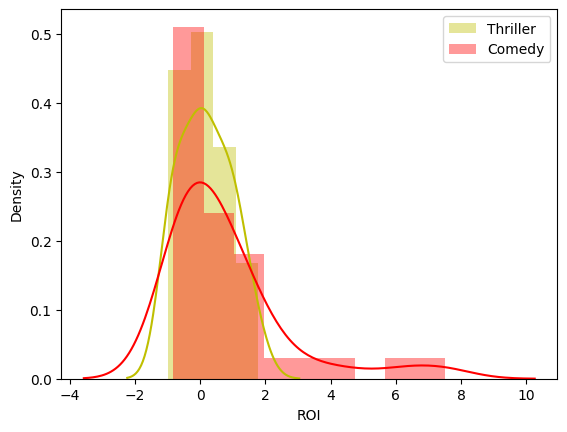

In [142]:
print(data_set.groupby("Genre").count())

# data_set[data_set["Genre"]==" Drama"]["ROI"]

sb.distplot(data_set[data_set["Genre"]=="Thriller"]["ROI"],color='y',label='Thriller')
sb.distplot(data_set[data_set["Genre"]=="Comedy"]["ROI"],color='r',label='Comedy')
plt.legend()
# data_set["Genre"].unique()

<Axes: >

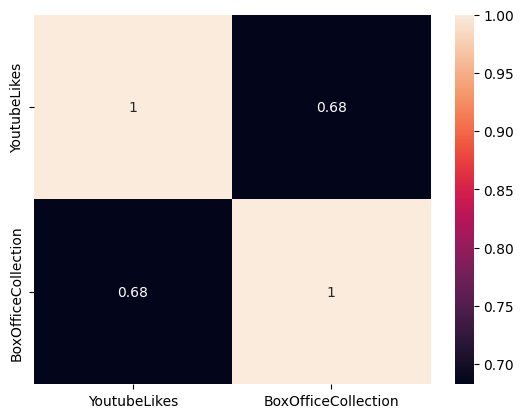

In [146]:

sb.heatmap(data_set[["YoutubeLikes","BoxOfficeCollection"]].corr(),annot=True)

<Axes: xlabel='Genre', ylabel='YoutubeLikes'>

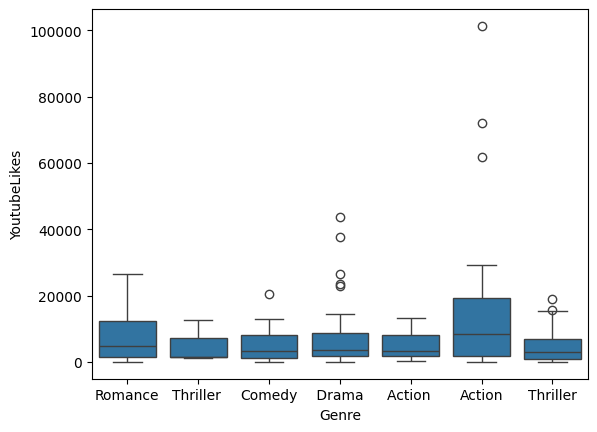

In [148]:
sb.boxplot(y="YoutubeLikes",x="Genre",data=data_set)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


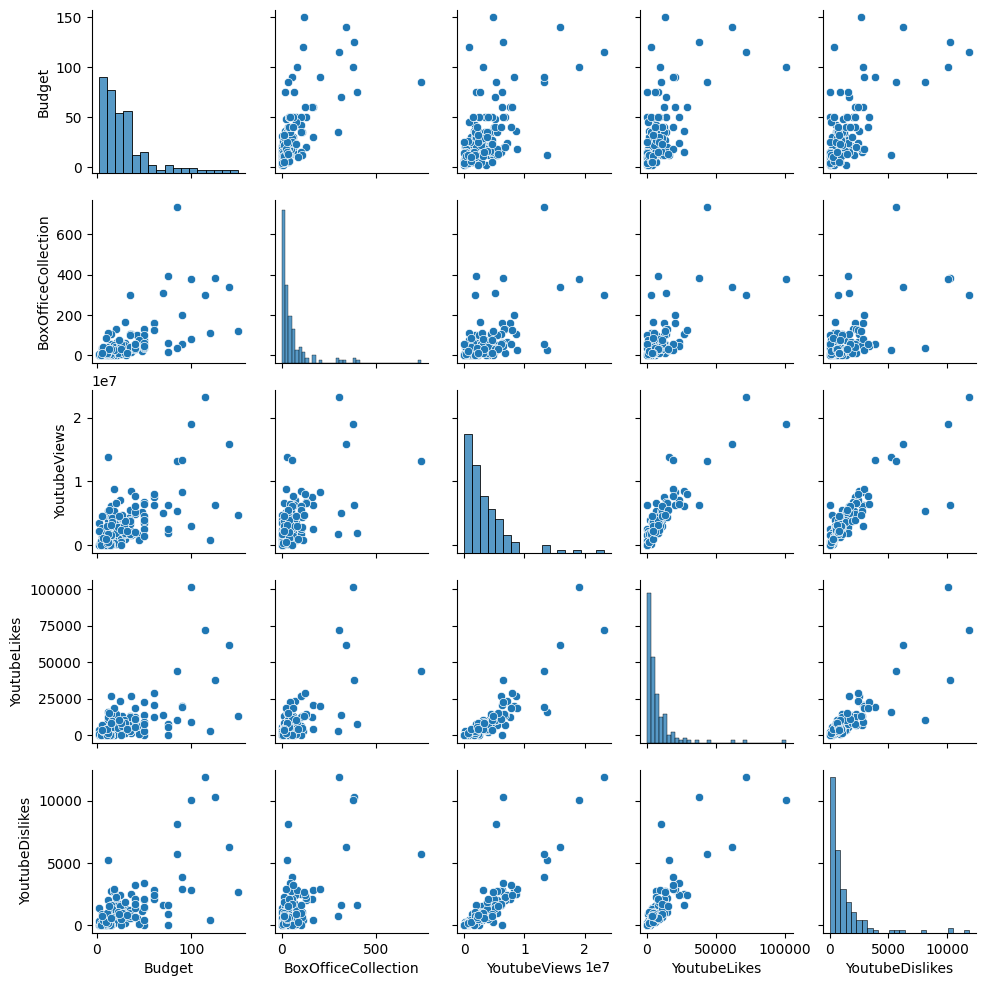

In [153]:
sb.pairplot(data=data_set[["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"]],size=2)
# data_set.columns

<Axes: >

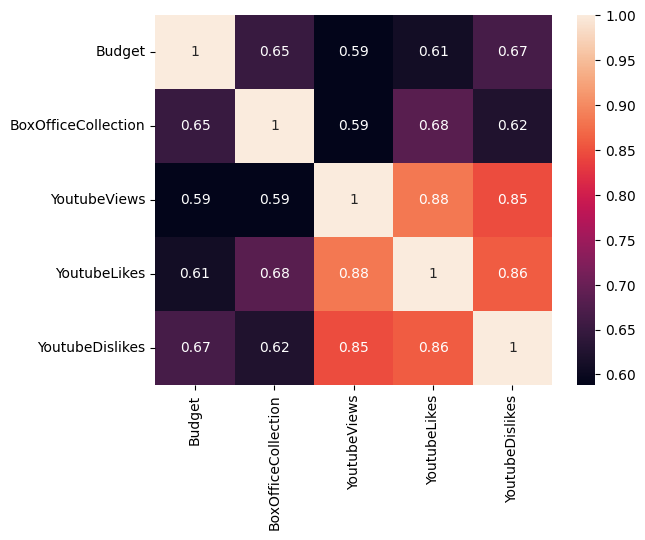

In [154]:
sb.heatmap(data_set[["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"]].corr(),annot=True)
